In [6]:
from ultralytics import YOLO 
import supervision as sv
import cv2
import matplotlib.pyplot as plt
from ultralytics.utils.plotting import Annotator

In [7]:
# use model
modelPath = "../result/detect/train/weights/best.pt"

legDetector = YOLO(modelPath)

legDetector.names

{0: 'leg'}

In [8]:
# test on one test image 
imageName = "frame_1272_jpg.rf.357f9189b0032177771993c6c2cd29fe"

imagePath = f"../dataset/test/images/{imageName}.jpg"

# save = True will create a runs folder to store the result 
result = legDetector.predict(imagePath, save=True, imgsz=640, conf=0.25, classes=[0]) # 0.25


image 1/1 C:\Users\LENOVO\OneDrive\Documents\GitHub\Crowd-Detection\FineTune\test\..\dataset\test\images\frame_1272_jpg.rf.357f9189b0032177771993c6c2cd29fe.jpg: 384x640 5 legs, 649.5ms
Speed: 15.8ms preprocess, 649.5ms inference, 15.6ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs\detect\predict


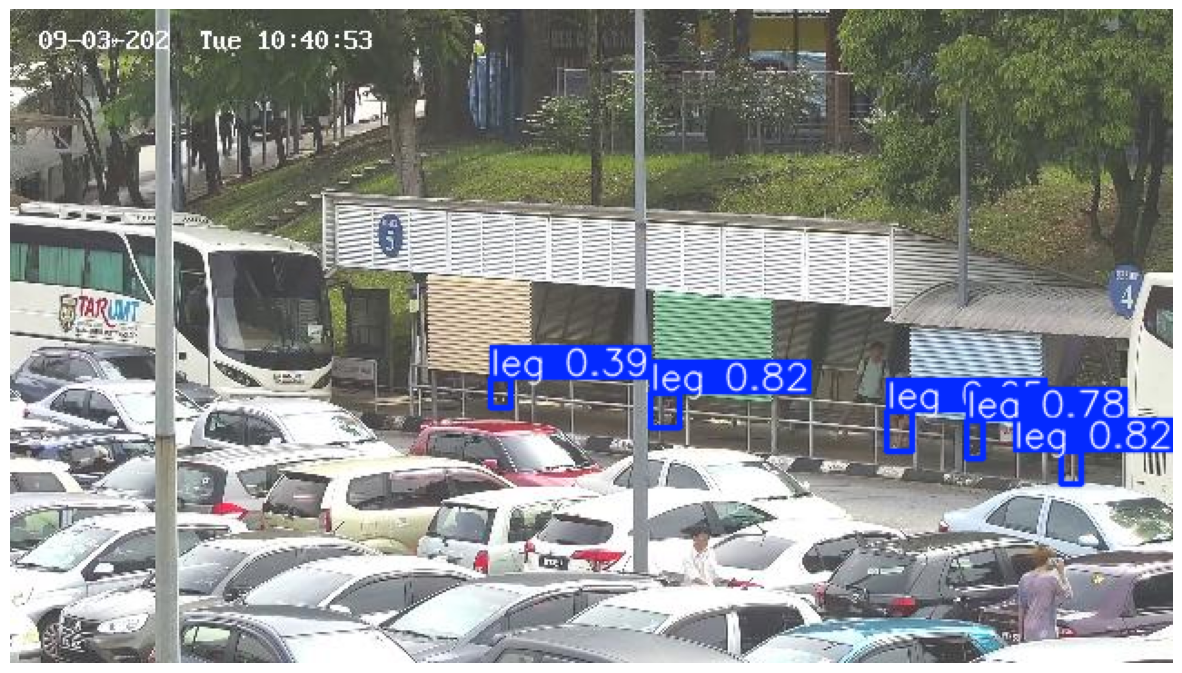

In [13]:
# display image 
annotatedImage = result[0].plot()

plt.figure(figsize=(15, 15))
plt.imshow(cv2.cvtColor(annotatedImage, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

# Calculate IoU
- ensure the annotated text file data is store in the below format
  - class_id x_center y_center width height 
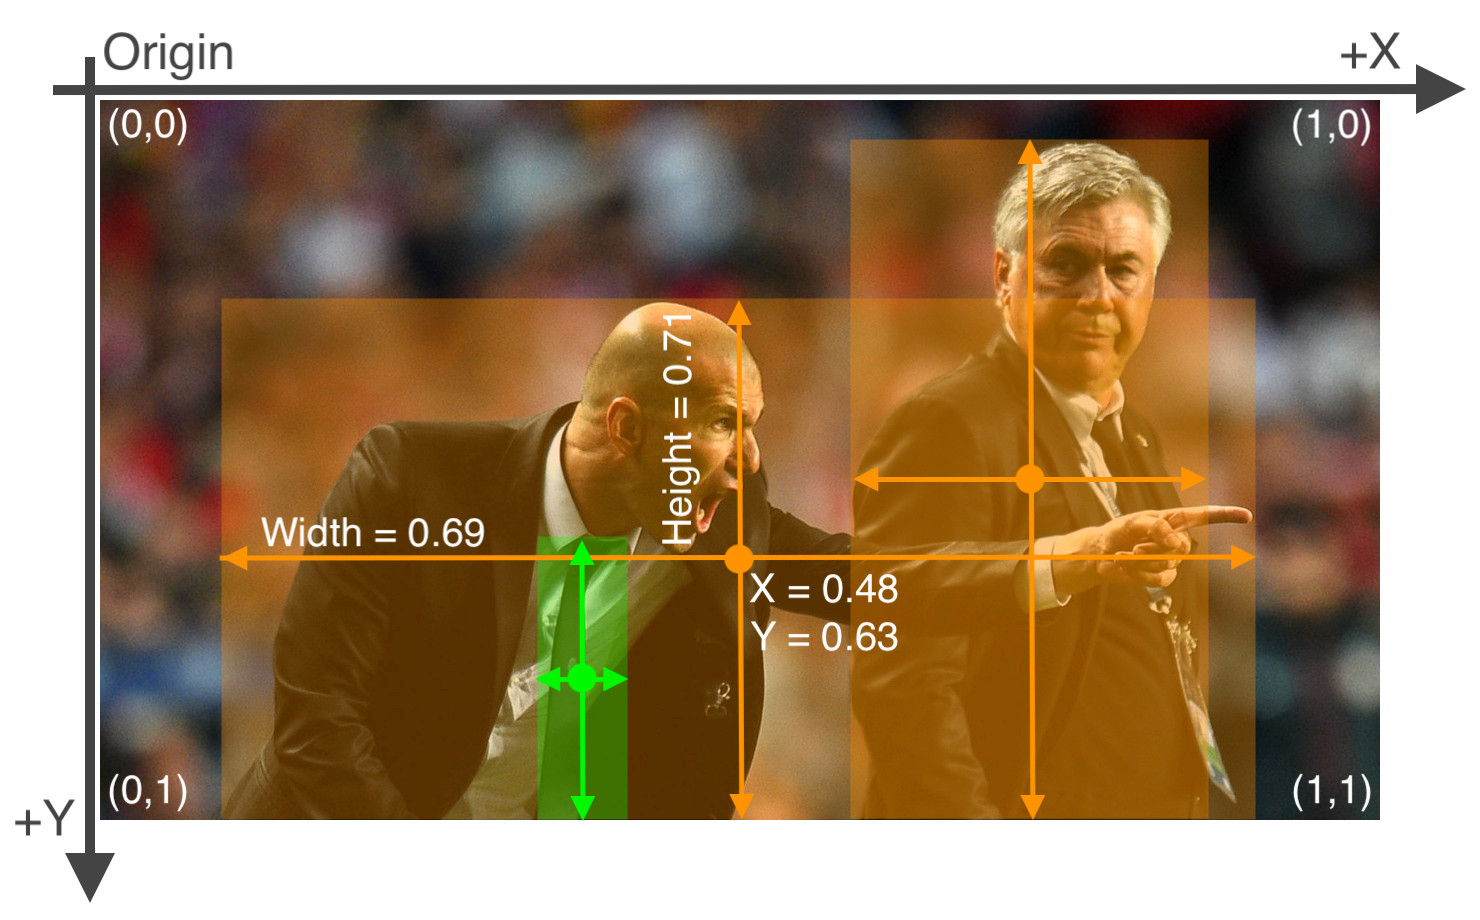

In [14]:
# <x_center> <y_center> <width> <height> or xywh
result[0].boxes.xyxy

tensor([[578.6771, 243.4044, 589.8680, 261.2037],
        [352.2567, 211.4224, 368.2358, 230.0531],
        [526.9167, 226.9597, 535.8298, 247.0516],
        [482.8115, 221.9318, 496.2460, 243.4862],
        [264.8707, 203.6066, 275.3594, 219.5208]])

In [ ]:
def calculate_iou(box1, box2):
    """
    Calculates the IoU (Intersection over Union) between two bounding boxes.
    
    Args:
        box1: List or array with coordinates [x1, y1, x2, y2] of the first box.
        box2: List or array with coordinates [x1, y1, x2, y2] of the second box.
        
    Returns:
        IoU: IoU value between the two boxes.
    """
    # Intersection coordinates
    x1_inter = max(box1[0], box2[0])
    y1_inter = max(box1[1], box2[1])
    x2_inter = min(box1[2], box2[2])
    y2_inter = min(box1[3], box2[3])
    
    # Intersection area
    inter_area = max(0, x2_inter - x1_inter) * max(0, y2_inter - y1_inter)
    
    # Areas of the boxes
    box1_area = (box1[2] - box1[0]) * (box1[3] - box1[1])
    box2_area = (box2[2] - box2[0]) * (box2[3] - box2[1])
    
    # Union area
    union_area = box1_area + box2_area - inter_area
    
    # IoU
    iou = inter_area / union_area if union_area != 0 else 0
    
    return iou

# Example of use
box1 = [50, 50, 150, 150]  # Coordinates of the predicted bounding box
box2 = [60, 60, 140, 140]  # Coordinates of the ground truth bounding box

iou_score = calculate_iou(box1, box2)
print(f"IoU score: {iou_score}")